# Picture/Image classification for Flowers
This simple projects objective is to create a model that identifies what type of flower it is. 


The chosen flowers are: 

1. daisy
2. dandelion
3. roses 
4. sunflowers
5. tulips


This notebook contains the objective
* Examine and understand data
* Build an input pipeline
* Build the model
* Train the model
* Test the model
* Improve the model and repeat the process




## Load the Keras and Tensorflow 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


## Check the number of Images

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Number of images:",image_count)

Number of images: 3670


## Image displays

Daisy Flower

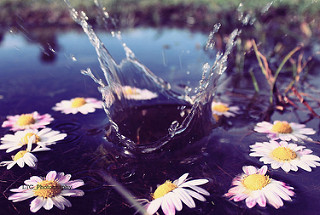

In [4]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[0]))

Roses

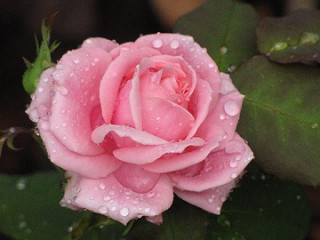

In [5]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[5]))

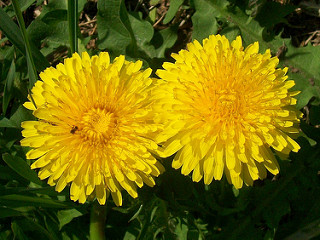

In [6]:
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[5]))

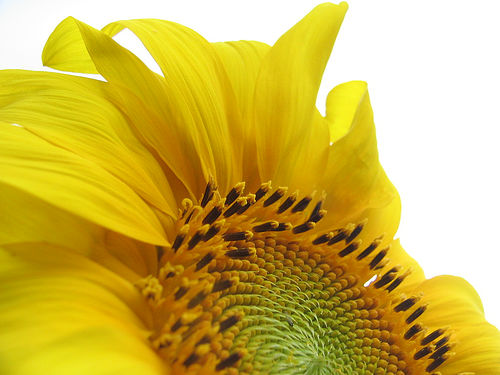

In [7]:
sun_flower = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sun_flower[5]))

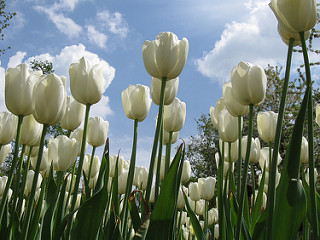

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[5]))

## Load using keras.preprocessing

Use the image dataset from directory tool to load these pictures from disk. This will convert a disk directory containing pictures into a tf.data file. In only a few lines of code, you can create a dataset.

Create a dataset
Define some parameters for the loader:

In [9]:
batch_size = 32
img_height = 180
img_width = 180

In [10]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


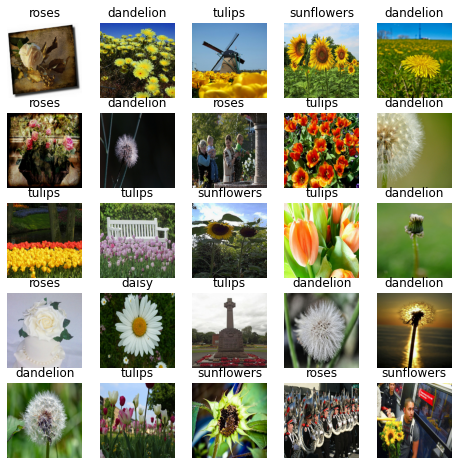

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [17]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0161317 1.0


In [18]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [21]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 85s 917ms/step - loss: 1.2361 - accuracy: 0.4816 - val_loss: 1.0335 - val_accuracy: 0.5913
Epoch 2/10
92/92 [==============================] - 82s 896ms/step - loss: 0.9523 - accuracy: 0.6325 - val_loss: 0.9289 - val_accuracy: 0.6185
Epoch 3/10
92/92 [==============================] - 82s 895ms/step - loss: 0.7600 - accuracy: 0.7084 - val_loss: 0.8646 - val_accuracy: 0.6594
Epoch 4/10
92/92 [==============================] - 82s 895ms/step - loss: 0.6101 - accuracy: 0.7738 - val_loss: 0.8474 - val_accuracy: 0.6635
Epoch 5/10
92/92 [==============================] - 83s 898ms/step - loss: 0.3856 - accuracy: 0.8600 - val_loss: 0.9598 - val_accuracy: 0.6649
Epoch 6/10
92/92 [==============================] - 83s 899ms/step - loss: 0.2226 - accuracy: 0.9305 - val_loss: 1.1952 - val_accuracy: 0.6512
Epoch 7/10
92/92 [==============================] - 83s 900ms/step - loss: 0.1484 - accuracy: 0.9489 - val_loss: 1.3723 - val_accuracy: 0.6294

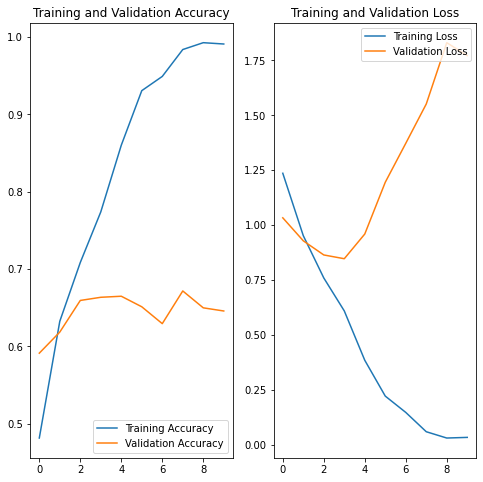

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

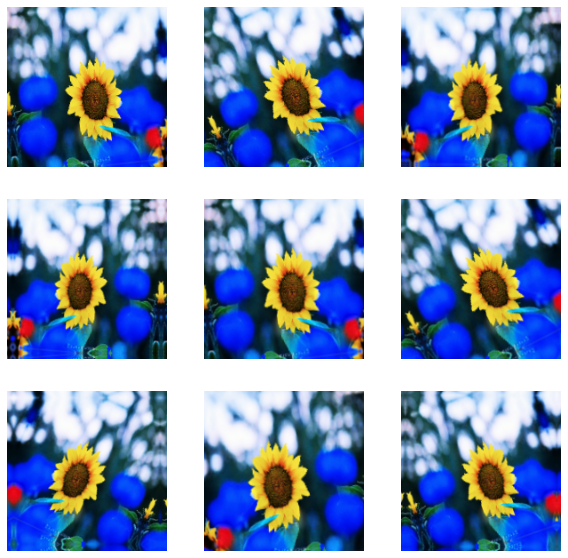

In [36]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [25]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [28]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 98s 1s/step - loss: 1.2613 - accuracy: 0.4547 - val_loss: 1.0853 - val_accuracy: 0.5450
Epoch 2/15
92/92 [==============================] - 97s 1s/step - loss: 1.0654 - accuracy: 0.5593 - val_loss: 1.1634 - val_accuracy: 0.5477
Epoch 3/15
92/92 [==============================] - 96s 1s/step - loss: 0.9680 - accuracy: 0.6199 - val_loss: 0.9189 - val_accuracy: 0.6199
Epoch 4/15
92/92 [==============================] - 96s 1s/step - loss: 0.8848 - accuracy: 0.6560 - val_loss: 0.9478 - val_accuracy: 0.6444
Epoch 5/15
92/92 [==============================] - 96s 1s/step - loss: 0.8180 - accuracy: 0.6938 - val_loss: 0.9043 - val_accuracy: 0.6580
Epoch 6/15
92/92 [==============================] - 96s 1s/step - loss: 0.7678 - accuracy: 0.7101 - val_loss: 0.8279 - val_accuracy: 0.6649
Epoch 7/15
92/92 [==============================] - 96s 1s/step - loss: 0.7561 - accuracy: 0.7105 - val_loss: 0.8270 - val_accuracy: 0.6839
Epoch 8/15
92/92 [==

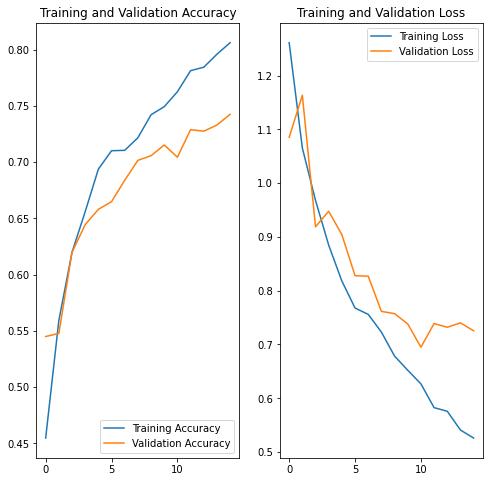

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
from PIL import Image
import requests
from IPython.display import display
def predict_image(url):
  im = Image.open(requests.get(url, stream=True).raw)
  img = im.resize((img_height, img_width))
  display(img)
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )

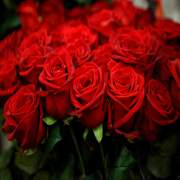

This image most likely belongs to roses with a 90.27 percent confidence.


In [31]:
predict_image("https://idsb.tmgrup.com.tr/ly/uploads/images/2021/02/12/92946.jpg")

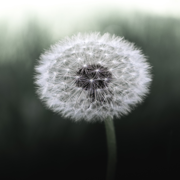

This image most likely belongs to dandelion with a 94.85 percent confidence.


In [32]:
predict_image("https://images.pexels.com/photos/3183660/pexels-photo-3183660.jpeg?cs=srgb&dl=pexels-branimir-balogovi%C4%87-3183660.jpg&fm=jpg")

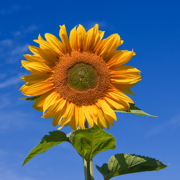

This image most likely belongs to sunflowers with a 90.40 percent confidence.


In [33]:
predict_image("https://upload.wikimedia.org/wikipedia/commons/4/40/Sunflower_sky_backdrop.jpg")

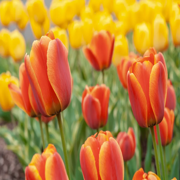

This image most likely belongs to tulips with a 98.45 percent confidence.


In [34]:
predict_image("https://www.thespruce.com/thmb/y0RVZcelnyhPwZlY-vsbK5kf8Aw=/960x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/tulips-planting-and-growing-tulips-1402137-06-5c18a69c82114b16bc8eb3baf69935e3.jpg")

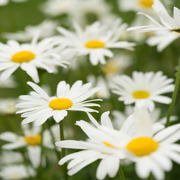

This image most likely belongs to daisy with a 98.02 percent confidence.


In [35]:
predict_image("https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/english-daisy-types-1586980894.jpg?crop=1.00xw:0.836xh;0,0.164xh&resize=980:*")

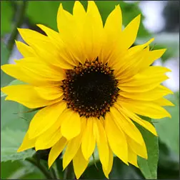

This image most likely belongs to sunflowers with a 99.26 percent confidence.


In [37]:
predict_image("https://www.rootwell.com/images/yellow-sunflower.jpg.webp")